ADF Statistic: -3.67557691916334
p-value: 0.004470100478130746


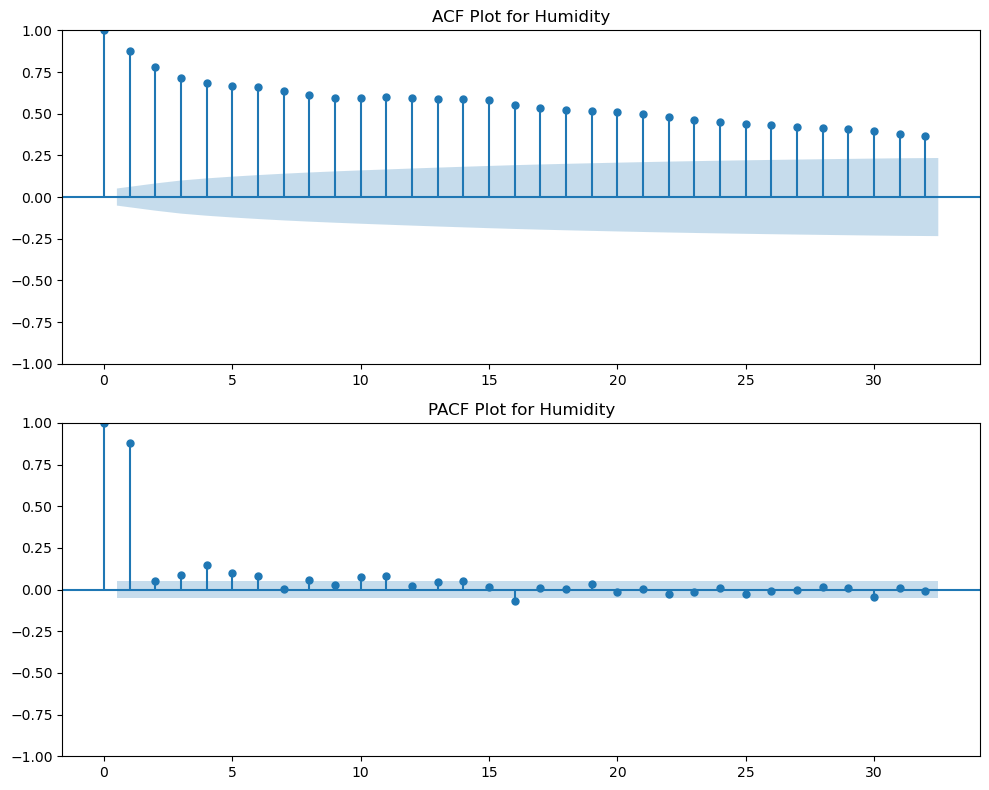

C:\Users\ikesc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ikesc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ikesc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ikesc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ikesc\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

Mean Squared Error: 326.41411313577976


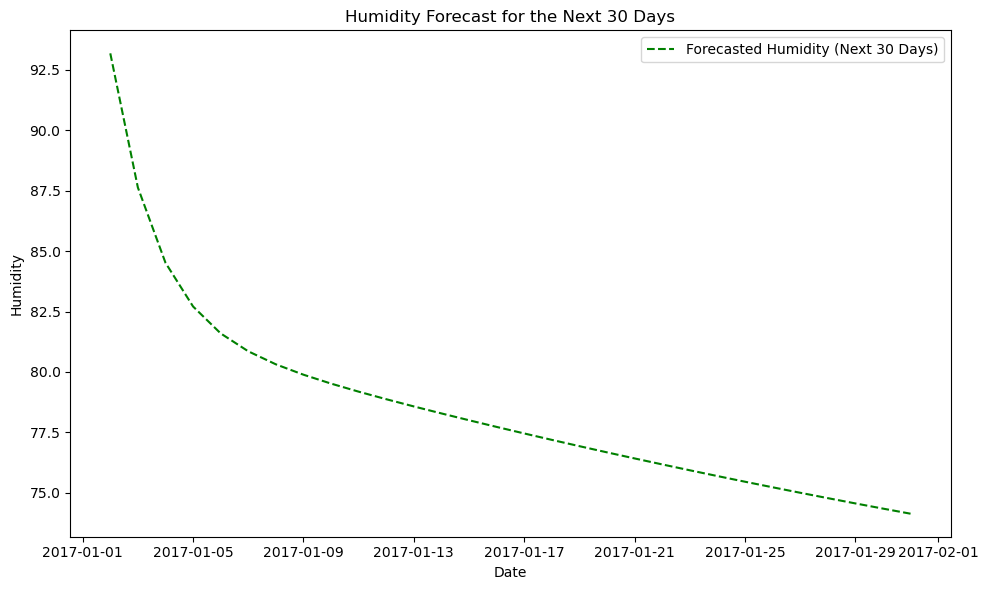

AttributeError: 'Series' object has no attribute 'append'

In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


file_path = 'DailyDelhiClimateTrain[1].csv'  # replace with your file path
data = pd.read_csv(file_path)


data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)


humidity_series = data['humidity']


adf_test_humidity = adfuller(humidity_series)
print(f'ADF Statistic: {adf_test_humidity[0]}')
print(f'p-value: {adf_test_humidity[1]}')


if adf_test_humidity[1] > 0.05:
   
    humidity_series_diff = humidity_series.diff().dropna()
else:
    
    humidity_series_diff = humidity_series


fig, ax = plt.subplots(2, 1, figsize=(10, 8))


plot_acf(humidity_series_diff, ax=ax[0])
ax[0].set_title("ACF Plot for Humidity")


plot_pacf(humidity_series_diff, ax=ax[1])
ax[1].set_title("PACF Plot for Humidity")

plt.tight_layout()
plt.show()


humidity_model = ARIMA(humidity_series, order=(2, 0, 2))
humidity_arma_result = humidity_model.fit()


humidity_forecast = humidity_arma_result.forecast(steps=30)
actual_humidity = humidity_series[-30:]  

mse_humidity = mean_squared_error(actual_humidity, humidity_forecast)
print(f'Mean Squared Error: {mse_humidity}')


future_humidity_forecast = humidity_arma_result.forecast(steps=30)


last_date = humidity_series.index[-1]
future_dates = pd.date_range(start=last_date, periods=31, freq='D')[1:]


plt.figure(figsize=(10, 6))


plt.plot(future_dates, future_humidity_forecast, label='Forecasted Humidity (Next 30 Days)', color='green', linestyle='--')


plt.title('Humidity Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.legend()

plt.tight_layout()
plt.show()

combined_dates = actual_humidity.index.append(future_dates)
combined_values = actual_humidity.append(future_humidity_forecast)

plt.figure(figsize=(10, 6))
plt.plot(actual_humidity.index, actual_humidity, label='Actual Humidity (Last 30 Days)', color='blue')


plt.plot(future_dates, future_humidity_forecast, label='Forecasted Humidity (Next 30 Days)', color='green', linestyle='--')


plt.title('Humidity: Last 30 Days vs Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.axvline(x=actual_humidity.index[-1], color='black', linestyle='--', label='Forecast Start')
plt.legend()

plt.tight_layout()
plt.show()

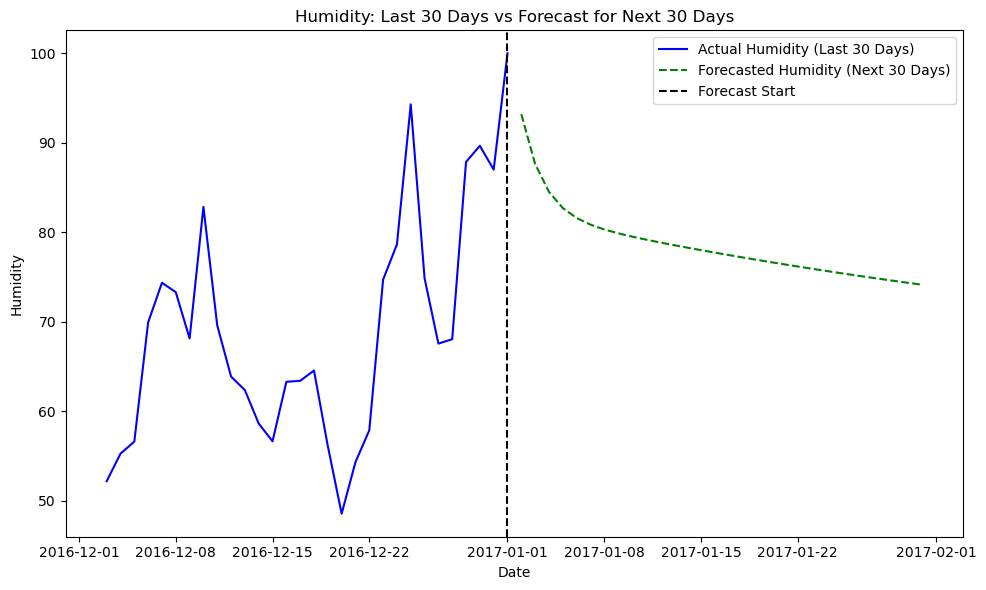

In [5]:

combined_dates = pd.concat([actual_humidity, future_humidity_forecast])
combined_dates.index = actual_humidity.index.append(future_dates)


plt.figure(figsize=(10, 6))
plt.plot(actual_humidity.index, actual_humidity, label='Actual Humidity (Last 30 Days)', color='blue')


plt.plot(future_dates, future_humidity_forecast, label='Forecasted Humidity (Next 30 Days)', color='green', linestyle='--')


plt.title('Humidity: Last 30 Days vs Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.axvline(x=actual_humidity.index[-1], color='black', linestyle='--', label='Forecast Start')
plt.legend()

plt.tight_layout()
plt.show()